# ALEXIS CARBILLET

In [1]:
## import librairies
import pandas
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
## import data
df = pandas.read_csv('project_pump.csv', sep=';')
(n,p)=df.shape

In [4]:
##  Preprocessing dataset
print((n,p))
c=df.columns.values

c=pandas.DataFrame.transpose(pandas.DataFrame(c))
c.columns=df.columns.values
# simply concatenate both dataframes 
c=c.append(df)

print(c.shape)

df.columns = ['Unix', 'Samples','Time','Sampling', 'Data']

m=0

for i in range(n):
    s=df['Data'][i]
    s=s.rstrip(']')
    s=s.lstrip('[')
    s=s.split(',')
    p2=len(s)
    for j in range(p2):
        m+=float(s[j]) # replace list by its mean
    df['Data'][i]=str(m/p2)


(881, 5)
(882, 5)


Text(0.5, 1.0, 'Elbow Method For Optimal k')

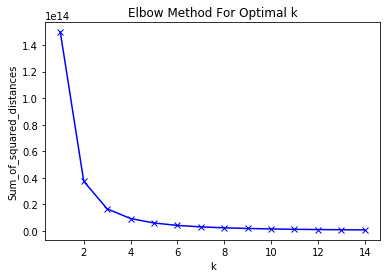

In [5]:
## How many cluster?
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)

plt.figure()
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')

In [6]:
## In the plot above the elbow is at k=3 indicating the optimal k for this 
# dataset is 3
kmeans = KMeans(n_clusters=3, random_state=0).fit(df)

In [7]:
## machine learning
labels=kmeans.labels_

def fit(nb,train,test,y,yt,height_f1,type):
    nb.fit(train, y)
    z=f1_score(yt, nb.predict(test),average='weighted')
    print('the f1 score obtained with ',type,' is:',z)
    height_f1.append(z)

def ml(train,test,y,yt):
    height_f1=[]
    bars=['bayes','perceptron','MLP','tree','logistic regression','kNN 3 neighbors',
          'kNN 7 neighbors','kNN 15 neighbors','SVC','Random Forest']
    # bayes
    nb = MultinomialNB()
    fit(nb,train,test,y,yt,height_f1,'bayes')
    # perceptron
    nb = Perceptron(tol=1e-3, random_state=0)
    fit(nb,train,test,y,yt,height_f1,'perceptron')
    # multi-layer perceptron
    nb = MLPClassifier(solver='lbfgs', alpha=1e-5, 
                       hidden_layer_sizes=(5, 2), random_state=1)
    fit(nb,train,test,y,yt,height_f1,'multi-layer perceptron')
    # tree classifier
    nb = DecisionTreeClassifier(random_state=0)
    fit(nb,train,test,y,yt,height_f1,'tree')
    # logistic regression
    nb = LogisticRegression(random_state=0, solver='lbfgs',
                            multi_class='multinomial')
    fit(nb,train,test,y,yt,height_f1,'logistic regression')
    # kNN 3
    nb = KNeighborsClassifier(n_neighbors=3)
    fit(nb,train,test,y,yt,height_f1,'kNN 3 neighbors')
    # kNN 7
    nb = KNeighborsClassifier(n_neighbors=7)
    fit(nb,train,test,y,yt,height_f1,'kNN 7 neighbors')
    # kNN 15
    nb = KNeighborsClassifier(n_neighbors=15)
    fit(nb,train,test,y,yt,height_f1,'kNN 15 neighbors')
    # SVC
    nb = SVC(gamma='auto')
    fit(nb,train,test,y,yt,height_f1,'SVC')
    # random forest
    nb = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
    fit(nb,train,test,y,yt,height_f1,'random forest')
    y_pos = np.arange(len(bars))
    plt.figure()

    title='F1 score'
    plt.title(title)
    plt.bar(y_pos, height_f1)  # Create bars
    plt.xticks(y_pos, bars, rotation=90) # Create names on the x-axis
    plt.subplots_adjust(bottom=0.3, top=0.95) # Custom the subplot layout
    plt.show()    # Show graphic
    print('the best one  is ',bars[height_f1.index(max(height_f1))],
          ' with a F1 score of ',height_f1[height_f1.index(max(height_f1))])

the f1 score obtained with  bayes  is: 0.949066391754719
the f1 score obtained with  perceptron  is: 0.1817365198685672
the f1 score obtained with  multi-layer perceptron  is: 0.15208166630295097
the f1 score obtained with  tree  is: 1.0
the f1 score obtained with  logistic regression  is: 1.0
the f1 score obtained with  kNN 3 neighbors  is: 0.9943474321779405
the f1 score obtained with  kNN 7 neighbors  is: 0.9943474321779405
the f1 score obtained with  kNN 15 neighbors  is: 1.0
the f1 score obtained with  SVC  is: 0.15208166630295097
the f1 score obtained with  random forest  is: 1.0


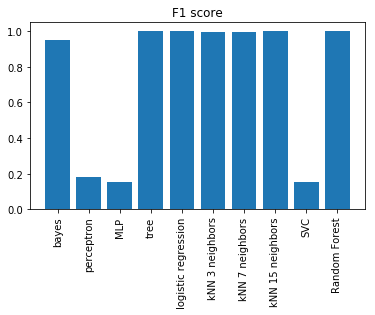

the best one  is  tree  with a F1 score of  1.0


In [8]:
X_train, X_test, y_train, y_test = train_test_split( df, labels, 
                                                    test_size=0.20, random_state=42)
ml(X_train,X_test,y_train,y_test)

In [9]:
## write in a new csv the results
df['Cluster'] = pandas.Series(labels, index=df.index)
df.to_csv('project_pump_modified.csv')

(899, 5)
(900, 5)
the f1 score obtained with  bayes  is: 0.9277228277764332
the f1 score obtained with  perceptron  is: 0.18148148148148147
the f1 score obtained with  multi-layer perceptron  is: 0.18148148148148147
the f1 score obtained with  tree  is: 0.9944434266327394
the f1 score obtained with  logistic regression  is: 0.9944434266327394
the f1 score obtained with  kNN 3 neighbors  is: 0.9888834582382969
the f1 score obtained with  kNN 7 neighbors  is: 0.9888834582382969
the f1 score obtained with  kNN 15 neighbors  is: 0.9944434266327394
the f1 score obtained with  SVC  is: 0.12950191570881225
the f1 score obtained with  random forest  is: 0.9944434266327394


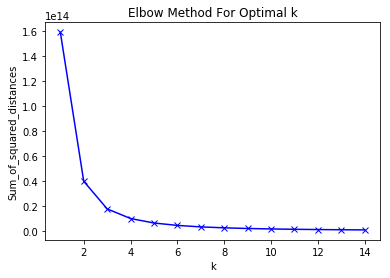

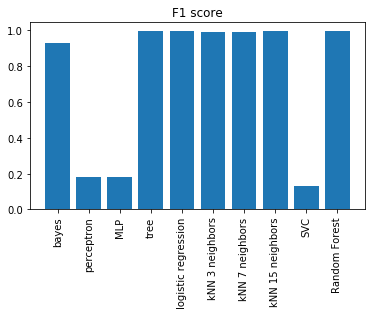

the best one  is  tree  with a F1 score of  0.9944434266327394


In [10]:
## bonus
df2 = pandas.read_csv('project_fan.csv', sep=';',
                      encoding='utf-8', engine='c')
(n,p)=df2.shape
print((n,p))
c=df2.columns.values

c=pandas.DataFrame.transpose(pandas.DataFrame(c))
c.columns=df2.columns.values
# simply concatenate both dataframes 
c=c.append(df2)

print(c.shape)
df2.columns = ['Unix', 'Samples','Time','Sampling', 'Data']
m=0

for i in range(n):
    s=df2['Data'][i]
    s=s.rstrip(']')
    s=s.lstrip('[')
    s=s.split(',')
    p2=len(s)
    for j in range(p2):
        m+=float(s[j]) # replace list by its mean
    df2['Data'][i]=str(m/p2)

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df2)
    Sum_of_squared_distances.append(km.inertia_)

plt.figure()
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
# still 3 states
kmeans = KMeans(n_clusters=3, random_state=0).fit(df2)
labels=kmeans.labels_
X_train, X_test, y_train, y_test = train_test_split( df2, labels,
                                                    test_size=0.20, 
                                                    random_state=42)
ml(X_train,X_test,y_train,y_test)
df2['Cluster'] = pandas.Series(labels, index=df2.index)
df2.to_csv('project_fan_modified.csv')